#### This interactive Python notebook is about your assignment (course work) to do some data analysis about sampled data regarding the key elements and ingredients leading to high quality red wines. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#### Task 1: Import the data as of the Excel file "winequality-red.cvs". Subsequently, write the code that displays the number of rows and columns in your imported data sample. [1 Mark]

In [12]:
file = pd.read_csv("winequality-red.csv")
df = file
df


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### Task 2: Write the code and type in the answer to the question “which are the three top independent (feature) variables with the least spread of data values?”. [1 Mark]

In [44]:
unique_ser = df.apply(lambda col: col.nunique(), axis=0)
v = dict(unique_ser)
onlykeys = v.keys()
lis = list(onlykeys)

feature = {}
temp = 0
for i in sorted (v.values()):
    if(temp < 3):
        feature[i] = lis[temp]
        temp+=1
    else:
        break
feature

{6: 'fixed acidity', 60: 'volatile acidity', 65: 'citric acid'}

#### Task 3: Write the code to generate and display the correlation matrix among all 12 variables (feature and target variables). Subsequently, answer the question about the top three feature variables, which appear to have the strongest correlation with the target variable “quality”. [3 Marks]

In [46]:
corr_matrix=df.corr()
res = corr_matrix["citric acid"].sort_values(ascending=False)
res[0:3]

citric acid      1.000000
fixed acidity    0.671703
density          0.364947
Name: citric acid, dtype: float64

#### Task 4: Write the code to examine which variables do follow the normal (Gaussian) distribution. Subsequently, provide and justify your answer based on your observations. [3 Marks]

(array([ 45., 229., 542., 371., 188., 110.,  76.,  26.,   5.,   7.]),
 array([ 4.6 ,  5.73,  6.86,  7.99,  9.12, 10.25, 11.38, 12.51, 13.64,
        14.77, 15.9 ]),
 <BarContainer object of 10 artists>)

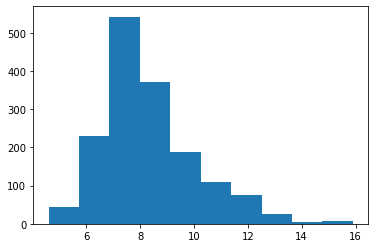

In [61]:
x = df["fixed acidity"]
y = df["free sulfur dioxide"]

plt.hist(x)


(array([464., 460., 299., 197., 113.,  39.,  11.,  12.,   0.,   4.]),
 array([ 1. ,  8.1, 15.2, 22.3, 29.4, 36.5, 43.6, 50.7, 57.8, 64.9, 72. ]),
 <BarContainer object of 10 artists>)

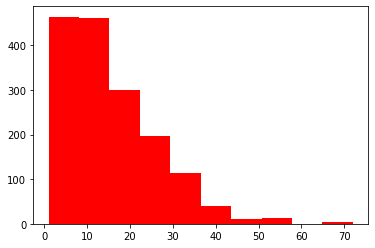

In [63]:
plt.hist(y, color= "r")

#### Task 5: Modify the given code such that a Principal Component Analysis (PCA) is carried out for all feature (independent) variables. Subsequently, draw a Scree plot to explain the ratio of variance as well as modify the given code to answer the question “which feature variables mostly contribute to the observed variance distribution by more than 30%”. [5 Marks]

In [66]:
from sklearn.preprocessing import StandardScaler
features = ['fixed acidity', 'volatile acidity', 'chlorides']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['fixed acidity']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)




In [72]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
wines_pca = pd.DataFrame(data = principalComponents
             , columns = ['PCA 1', 'PCA 2'])
wines_pca

,PCA 1,PCA 2
0,1.065868,-0.017470
1,1.548280,0.775682
2,1.098761,0.445682
3,-2.116753,-0.391691
4,1.065868,-0.017470
...,...,...
1594,1.147265,-0.037201
1595,1.136344,-0.710525
1596,0.788451,-0.462904
1597,1.475201,-0.285736


Text(0, 0.5, 'PC 2')

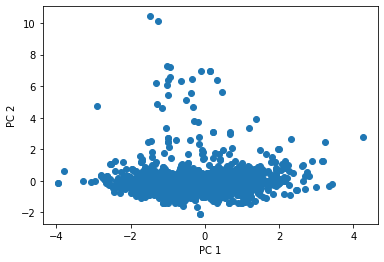

In [74]:
ax = plt.gca()
ax.scatter(wines_pca["PCA 1"], wines_pca["PCA 2"])
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')

[Text(0, 0, 'PC0'), Text(1, 0, 'PC1')]

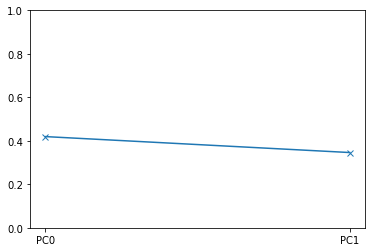

In [76]:
ax = plt.gca()
expl_var = pca.explained_variance_ratio_
ax.plot(expl_var, marker='x')
ax.set_ylim(0,1.)
ax.set_xticks([0,1])
ax.set_xticklabels(["PC{}".format(i) for i in range(2)])

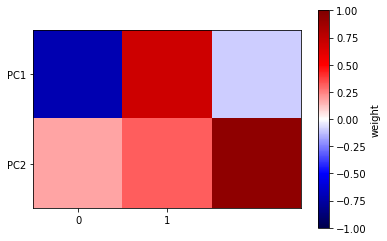

In [80]:
comps = pca.components_
ax = plt.gca()
img = ax.imshow(comps, cmap='seismic', vmin=-1, vmax=1)
plt.colorbar(img, label="weight")
ax.set_yticks([0,1])
t = ax.set_yticklabels(["PC{}".format(i+1) for i in range(2)])
ax.set_xticks([0,1])


#### Task 6: Write/modify the code to repeat task 5, this time, however, this time with normalized values across all feature variables. Explain the observed differences and answer again the question: Which feature variables mostly contribute to the observed variance distribution by more than 30%? [5 Marks]

In [81]:
# Normalize feature variables
from sklearn import preprocessing as pp

In [91]:
ss = pp.StandardScaler()
x = df.loc[:, features].values

ss.fit(x)
pca_norm = PCA()
pca_norm.fit(ss.transform(x))
wines_pca_norm = pca_norm.transform(ss.transform(x))

In [94]:
print(np.array(df[["citric acid", "chlorides"]])[np.where(pca_norm.components_[0,:] > 0.3)[0]])

[[0.    0.098]]


#### Task 7: Write/modify the code to calculate the following two empirical probabilities (e.g., all 1599 rows as sample data): a) Probability of red wine quality to be less than 5, i.e., P(X<5), b) Probability of red wine quality to be equal or greater than 8, i.e., P(X ≥ 8), X = “quality”. [4 Marks]

In [95]:
from matplotlib import pyplot
from numpy.random import normal
from numpy import hstack
from statsmodels.distributions.empirical_distribution import ECDF

#### Task 8: Let us assume that French wine makers and producers claim that it is possible to produce next year 1,000,000 bottles of red wines, to be considered as a population, a) with an average of quality equal or greater than 7, b) the distribution of quality scores will not be equal. Write the code, which states the Null (Ho) and alternative (H1) hypotheses such that you either reject or accept these two claims, (a) and (b), with confidence values 98% and 95%, respectively, on the basis of evidence provided by your 1599 large sample data. [6 Marks]

In [122]:
smpl = df.quality.mean()
sig_smpl = np.std(np.array(df.quality))
data = np.random.normal(smpl, sig_smpl, 10000)

import scipy as si
sci = si.stats.norm.interval(0.95, loc=1.5, scale=2)
zscore = smpl/sig_smpl
p_val = si.stats.norm.sf(abs(zscore))
alpha = 0.98
beta  = 0.95

if(p_val <0.05):
    print("reject hypothesis")
else:
    print("accepted")

reject hypothesis


In [123]:
data = np.random.normal(smpl, sig_smpl, 10000)
sci = si.stats.norm.interval(0.98, loc=1.5, scale=2)
zscore = smpl/sig_smpl
p_val = si.stats.norm.sf(abs(zscore))
alpha = 0.98
beta  = 0.95

if(p_val <0.05):
    print("reject hypothesis")
else:
    print("accepted")

reject hypothesis


#### Task 9: Let us assume that you have a first attempt at estimating a simple linear regression model with all 11 predictor (feature) variables predicting the quality of red wine (target variable). The model should take the form: y = a + b1X1 + b2X2+….+b11X11, with a being the intercept and b1,…b11, the co-efficients. Assuming also that the values of the predictor variables are normalised, write the code, which will deliver an estimate of this model, i.e., intercept and coefficients, as well as an estimate of how fit is the model in terms of metrics such as R-square and the Mean Squared Error. [6 Marks]

In [125]:
# Normalize feature variables
from sklearn.preprocessing import StandardScaler
X_features = x
X_norm = StandardScaler().fit_transform(x)

In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Build linear regression model using different variables as predictors of quality
# Split data into predictors X and output Y
predictors = ['fixed acidity', 'density', 'citric acid', 'chlorides', 'free sulfur dioxide', 'volatile acidity', 'pH', 'alcohol', 'sulphates', 'residual sugar', 'total sulfur dioxide']
X = df[predictors]
y = df['quality']

# Initialise and fit model
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.20, random_state=0)


lm = LinearRegression().fit(x, y)
model = lm.fit(X, y)


In [152]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = 21.96520844944242
betas = [ 2.49905527e-02 -1.78811638e+01 -1.82563948e-01 -1.87422516e+00
  4.36133331e-03 -1.08359026e+00 -4.13653144e-01  2.76197699e-01
  9.16334413e-01  1.63312698e-02 -3.26457970e-03]


#### Task 10: Based on the result of task 9, you make now an attempt to improve your linear regression model by turning it into a polynomial expression, i.e., adding as parameters squared variables and/or their combinations. For instance, your model should take the form: y = a +b1X1 + b1X12 + b2X1X2 + ….+error. Write/modify the code such that different degrees up to 5 are tried out. In your attempts, you may opt for suppressing the Intercept. Subsequently, state your observations on how the performance of these models is improved in terms of the R-square metric. Finally, explain whether an improved performance, as measured by the R-square metric, can be trusted and suggest ways to prove this trust. [6 Marks]

In [153]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [154]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [155]:
X_pol = PolynomialFeatures(degree=5, interaction_only=False, include_bias=False).fit_transform(X)

In [156]:
X_pol

array([[7.40000000e+00, 9.97800000e-01, 0.00000000e+00, ...,
        1.41887440e+05, 2.53903840e+06, 4.54354240e+07],
       [7.80000000e+00, 9.96800000e-01, 0.00000000e+00, ...,
        2.03315788e+06, 5.23929146e+07, 1.35012511e+09],
       [7.80000000e+00, 9.97000000e-01, 4.00000000e-02, ...,
        8.32984560e+05, 1.95570288e+07, 4.59165024e+08],
       ...,
       [6.30000000e+00, 9.95740000e-01, 1.30000000e-01, ...,
        3.38560000e+05, 5.88800000e+06, 1.02400000e+08],
       [5.90000000e+00, 9.95470000e-01, 1.20000000e-01, ...,
        3.40736000e+05, 7.49619200e+06, 1.64916224e+08],
       [6.00000000e+00, 9.95490000e-01, 4.70000000e-01, ...,
        9.60180480e+05, 1.12021056e+07, 1.30691232e+08]])